### Statistics Mini Project

### 1. Perform the following statistical analysis on the fifa world cup dataset. The dataset consists of player information, which includes height; weight overall rating, potential etc. Data Cleaning and basic EDA process needs to be performed. 


In [157]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns

In [158]:
df=pd.read_csv("fifa_stats.csv")
df.head()

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154


#### a)	Assuming age as population, perform the central limit theorem with sample size of 200. Find the standard error and the mean of sampling distribution. Compare the results with population mean and standard deviation. Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size

In [36]:
n=200
pop=df["Age"]
mu_pop=np.mean(pop)
print(pop_mean)
std_pop=np.std(pop)
print(std_pop)

27.2315
3.8580963894127795


In [33]:
std_samp=np.std(pop,ddof=1)
std_samp

3.8590612753574423

In [24]:
std_error=std_pop/np.sqrt(n)
std_error

0.2728086119425111

In [20]:
mu_pop  # beacause the properties of central limit theoram says when sample size keep increases the sampling distribution tends
        #to normal distribution so the mean of sampling distribution is equal to mu.

27.2315

In [1]:
# due to central limit theoram estimated standard error of a sample mean tends to decrease with an increase in sample size.

#### b)	Is there any evidence that the players overall rating is greater than 80?

In [2]:
# Ho:Overall_rating=80
# Ho:Overall_rating!=80

In [9]:
samp=df["Overall_rating"]
mu=80
x_bar=np.mean(samp)
s=np.std(samp)
n=len(samp)
tstat=(x_bar-mu)/(s/np.sqrt(n))
tstat

-24.544597415236936

In [47]:
pval=stats.t.sf(abs(tstat),df=n-1)*2
pval

1.6789997419549865e-116

In [130]:
stats.ttest_1samp(samp, popmean=80)

Ttest_1sampResult(statistic=-24.538460498672062, pvalue=1.885376780327322e-116)

In [11]:
# pval=0
# sig lvl=0.05
# pval<sig lvl
# Ho is rejected and Ha is selected
# tests= -ve
# so there is no evidence that overall players ratings is greater than 80. 

#### c)	Perform the statistical test to identify whether preferred foot has any impact on potential. Also, perform the graphical analysis.


In [39]:
df["Preferred Foot"].value_counts()

Right    1534
Left      466
Name: Preferred Foot, dtype: int64

In [31]:
pref_R=df[df["Preferred Foot"]=="Right"]["Potential"]
pref_L=df[df["Preferred Foot"]=="Left"]["Potential"]

In [18]:
# Ho: mu1=mu2(no relation or mo effact)
# Ha: mu1!=mu2( relation or  effact)

In [21]:
stats.ttest_ind(pref_R,pref_L)

Ttest_indResult(statistic=-1.5378037422592814, pvalue=0.12425494914461453)

In [40]:
# pval=0.12
# sig lvl=0.05
# pval>sig lvl
# Ho is selected 
# preferred foot has no impact on potential.

#### d)	Perform the statistical test to identify the relation between the overall rating and potential. [Assume both are continuous data points].


In [43]:
overall_rating =df["Overall_rating"]
potential=df["Potential"]

In [45]:
# Ho: mean of the overall rating equal to potential.(no relation or no effact between overall ratings and potential)
# Ha: mean of the overall rating not equal to potential.( relation or  effact between overall ratings and potential)

In [44]:
stats.pearsonr(overall_rating,potential)

(0.7326945574179996, 0.0)

In [47]:
# pval=0.0
# sig lvl=0.05
# pval<sig lvl
# Ho is rejected and Ha is selected
# pearson test of correlation = +ve 
# so there are relation between overall rating and potential
# so there are positively correlated relation between the overall rating and potential.

#### e)	Does skill move have any effect in overall rating? Perform the graphical analysis and the statistical analysis.


In [50]:
skill_move =df["Skill Moves"]
overall_rating=df["Overall_rating"]

In [49]:
# Ho: mean of the skill moves equal to overall ratings.(no relation or no effact between overall ratings and potential)
# Ha: mean of the skill moves not equal to overall rating.( relation or  effact between overall ratings and potential)

In [51]:
stats.pearsonr(skill_move,overall_rating)

(0.08159348248403268, 0.0002594145569635645)

In [47]:
# pval=0.002
# sig lvl=0.05
# pval<sig lvl
# Ho is rejected and Ha is selected
# pearson test of correlation = +ve 
# so there are relation between overall rating and potential
# so there are positively correlated relation between the overall rating and potential.

<AxesSubplot:>

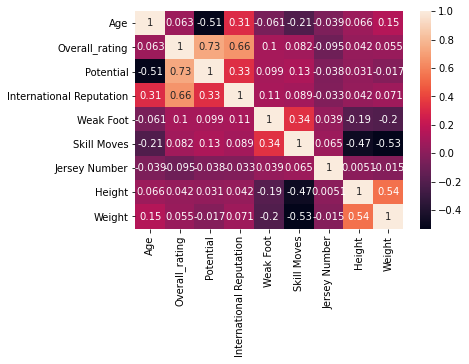

In [168]:
sns.heatmap(df.corr(), annot=True)

In [53]:
# so above graphical analysis we can see that the correlation between skill moves and overall ratings is 0.082.

#### Note: 
###### 1) Perform all the Statistical analysis with 5% (Significance level). 
###### 2) Assume all the features are normally distributed and have equal variance.


### 2. Perform the following statistical analysis on the mobile network dataset given. The given data set contains information about the internet, calls, and messages of various network. Data Cleaning and basic EDA process needs to be performed. 


In [141]:
df1=pd.read_csv("phone.csv")
df1.head()

,date,duration,item,month,network,network_type
0,15-10-14 6:58,221.321120,data,2014-11,data,data
1,15-10-14 6:58,81.610599,call,2014-11,Vodafone,mobile
2,15-10-14 14:46,143.109111,call,2014-11,Meteor,mobile
3,15-10-14 14:48,111.888670,call,2014-11,Tesco,mobile
4,15-10-14 17:27,246.695171,call,2014-11,Tesco,mobile


#### a) With 95% & 99% Confidence Interval, find the range estimate of average duration calls made by the entire network. Which of the Intervals are wider? Interpret the results.

In [57]:
x=df1["duration"]

In [58]:
# for 95% confidence interval

x_bar=np.mean(x)
std=np.std(x)
n=len(x)
z=1.96
LL=x_bar-(z*std)/np.sqrt(n)
UL=x_bar+(z*std)/np.sqrt(n)
print(LL,UL)


141.1796896491396 147.43018147053132


In [60]:
# so for 95% confidence interval the range estimation of avg duration calls is 141.17 to 147.43.

In [59]:
# for 99% confidence interval
x_bar=np.mean(x)
std=np.std(x)
n=len(x)
z=2.58
LL=x_bar-(z*std)/np.sqrt(n)
UL=x_bar+(z*std)/np.sqrt(n)
print(LL,UL)


140.19109145289906 148.41877966677185


In [61]:
# so for 99% confidence interval the range estimation of avg duration calls is 140.19 to 148.41.

In [ ]:
# Interpretaion:
# So 99% confidence interval the intervals are wider as compare to 95% confidence interval.

#### b) Perform statistical analysis to check whether the networks are equally distributed in the dataset.

In [148]:
# Ho: networks are equally distributed
# Ha: networks are not equally distributed

In [146]:
obs=df1["network"].value_counts()

In [145]:
exp=df1["network"].value_counts().mean()

In [142]:
obs=df1["network"]

In [147]:
stats.chisquare(f_obs=obs,f_exp=exp)

Power_divergenceResult(statistic=307.409756097561, pvalue=2.112592760257685e-63)

In [149]:
# pval=0
# sig lvl=0.05
# pval< sig lvl
# Ho is rejected and Ha is selected
# networks are not equally distributed

#### c) Plot the distribution of duration with respect to each network in the same graph and interpret the results from the graph.

network
Meteor       AxesSubplot(0.125,0.125;0.775x0.755)
Tesco        AxesSubplot(0.125,0.125;0.775x0.755)
Three        AxesSubplot(0.125,0.125;0.775x0.755)
Vodafone     AxesSubplot(0.125,0.125;0.775x0.755)
data         AxesSubplot(0.125,0.125;0.775x0.755)
landline     AxesSubplot(0.125,0.125;0.775x0.755)
voicemail    AxesSubplot(0.125,0.125;0.775x0.755)
Name: duration, dtype: object

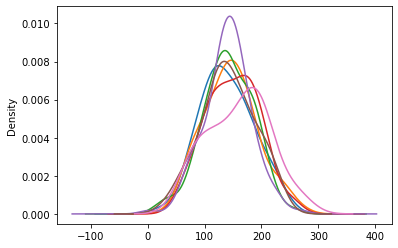

In [85]:
df1.groupby(df1["network"])["duration"].plot(kind="density")

In [110]:
# Interpretation:
# using this graph we can conclude that,all the mean duration of each network are equal that means there is no relation between item
# i.e mu1=mu2=mu3=.....=mu7

#### d)	Perform statistical tests to identify the relation between item and duration. Detailed explanation of relation between the classes is required.

In [93]:
df1["item"].value_counts()

call    388
sms     282
data    150
Name: item, dtype: int64

In [94]:
item_call=df1[df1["item"]=="call"]["duration"]
item_sms=df1[df1["item"]=="sms"]["duration"]
item_data=df1[df1["item"]=="data"]["duration"]

In [99]:
# Ho: All the mean item are equal(no relation or no effact between item and duration )
# Ha: Atleat one of the mean item are not equal(realtion or effact between item and duration )

In [109]:
# selection of test- one way Anova test

In [95]:
stats.f_oneway(item_call,item_sms,item_data)

F_onewayResult(statistic=1.9313964906864995, pvalue=0.1456068656611744)

In [101]:
# pval=0.14
# sig lvl=0.05
# pval>sig lvl
# Ho is selected
# so there are no any realtionship between item and duration.

#### e)	Perform statistical tests to identify the relation between network and network_type. 

In [103]:
obs=pd.crosstab(df1["network"],df1["network_type"])
obs

network_type,data,landline,mobile,voicemail
network,,,,
Meteor,0,0,87,0
Tesco,0,0,84,0
Three,0,0,215,0
Vodafone,0,0,215,0
data,150,0,0,0
landline,0,42,0,0
voicemail,0,0,0,27


In [105]:
# Ho: Two categorical columns are not dependent(no relation or no effact)
# Ha: Two categorical columns are dependent(relation or effact)

In [106]:
# selection of test- the test of indepaendent of attribute.

In [104]:
stats.chi2_contingency(obs)

(2460.0,
 0.0,
 18,
 array([[ 15.91463415,   4.45609756,  63.76463415,   2.86463415],
        [ 15.36585366,   4.30243902,  61.56585366,   2.76585366],
        [ 39.32926829,  11.01219512, 157.57926829,   7.07926829],
        [ 39.32926829,  11.01219512, 157.57926829,   7.07926829],
        [ 27.43902439,   7.68292683, 109.93902439,   4.93902439],
        [  7.68292683,   2.15121951,  30.78292683,   1.38292683],
        [  4.93902439,   1.38292683,  19.78902439,   0.88902439]]))

In [107]:
# pval=0
# sig lvl=0.05
# pval< sig lvl
# Ho is rejected and Ha is selected 
# Two categorical columns are dependent.

#### Note: 
#### 1) Perform all the Statistical analysis with 5% (Significance level). 
#### 2) Perform the test of normality and test of variance in the appropriate places.
